In [6]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

local_path = '/Users/halvardbariller/Desktop/M2_MVA/_SEMESTER_1/PGM/Project/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GMM

In [7]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.5, 0.5]

In [8]:
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

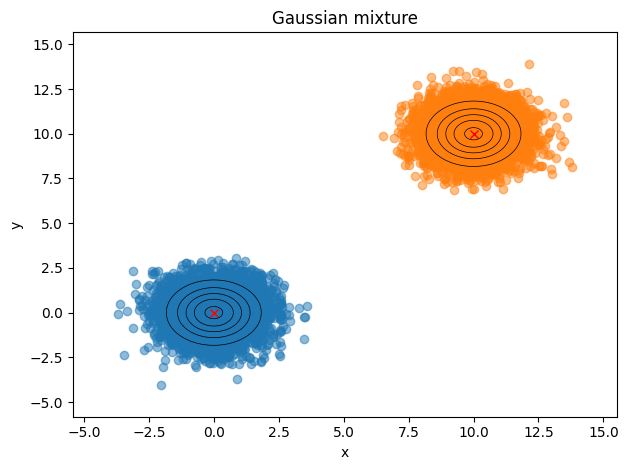

In [9]:
visualisation.plot_GMM(gmm_data, clusters, mus, sigmas, alphas)

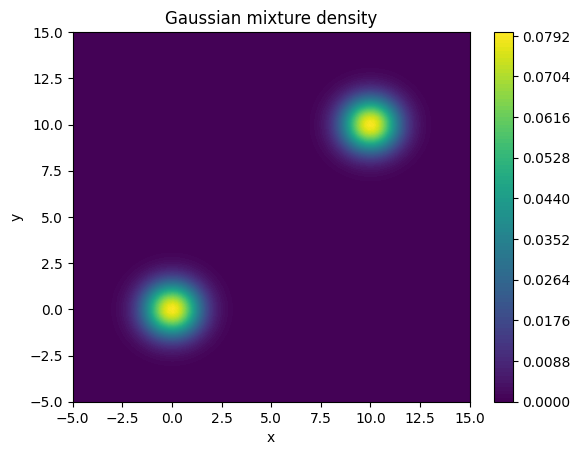

In [10]:
visualisation.gmm_density_heatmap(densities.gmm_density, mus, sigmas, alphas)

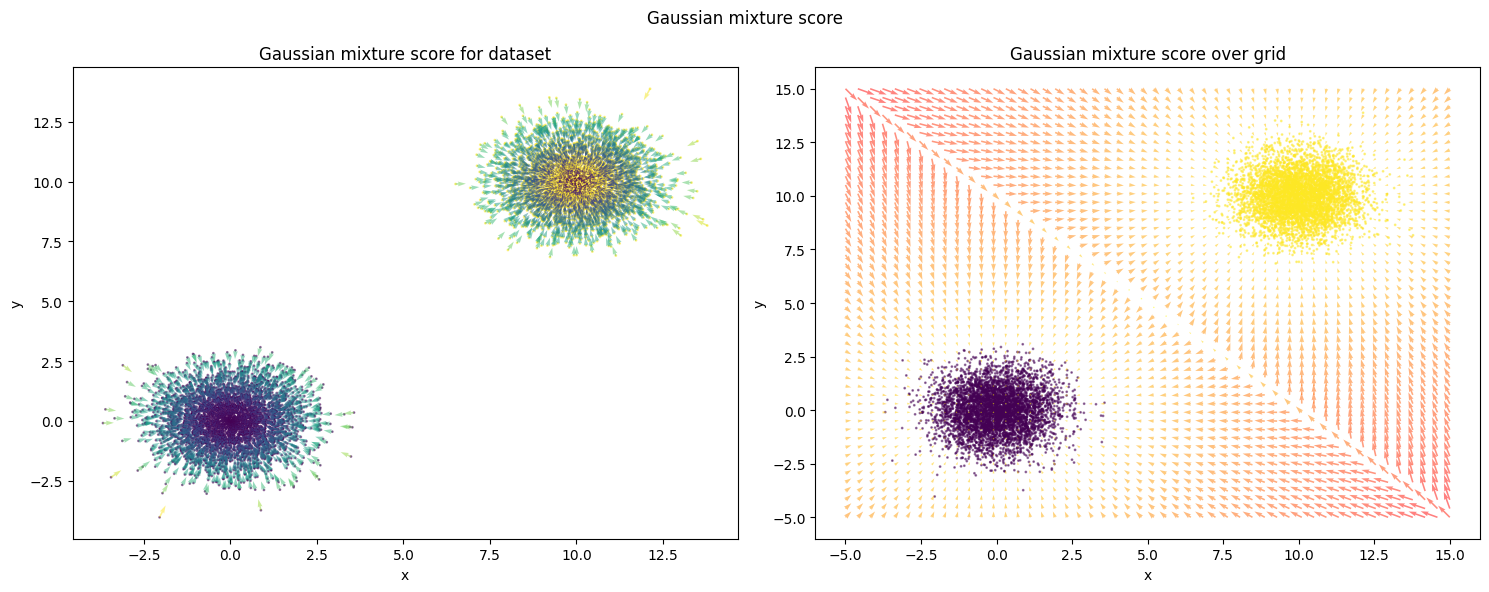

In [11]:
visualisation.gmm_score_plot(data=gmm_data, clusters=clusters, mus=mus, sigmas=sigmas, alphas=alphas)

# Banana-shaped data

In [12]:
# Parameters
N = 10000
mu_banana = np.array([0, 0])
sigma_banana = np.eye(2)

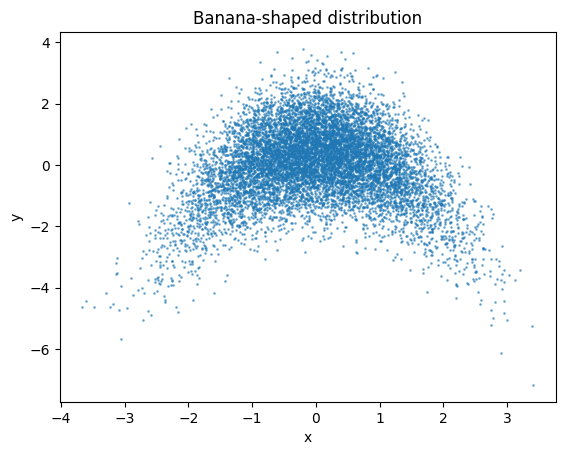

In [13]:
banana_data = sampling.banana_shaped_sampling(N, mu_banana, sigma_banana)

visualisation.plot_banana(banana_data)

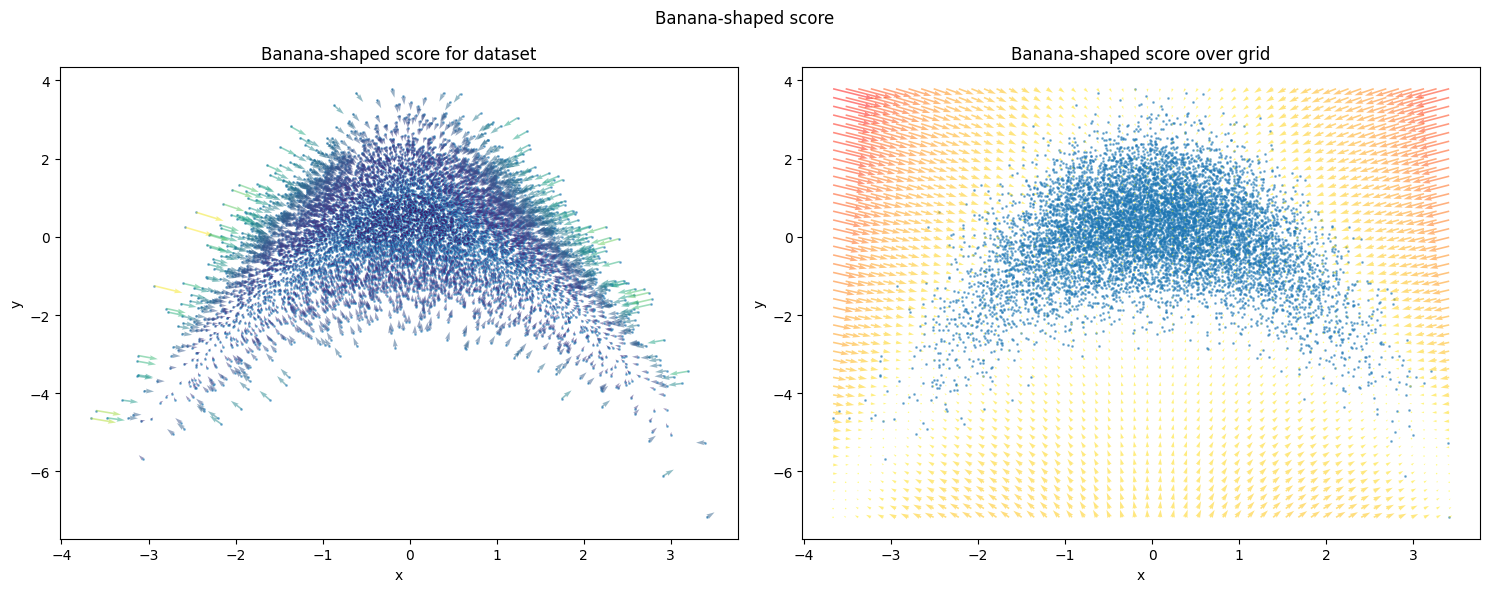

In [14]:
visualisation.banana_score_plot(banana_data)

# Score estimation

In [19]:
# Parameters
learning_rate = 1e-3
hidden_size = 128
num_epochs = 1000

In [20]:
# Model
score_network = toy_models.ToyScoreNetwork(hidden_size=hidden_size).to(device)
optimizer = torch.optim.Adam(score_network.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'implicit_score_matching', device)

### GMM

In [16]:
ScoreMatching.train(gmm_data, score_network, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:59<00:00, 16.70it/s]

Training finished!


[0.47065433859825134,
 0.03559271618723869,
 0.08798693865537643,
 0.14837361872196198,
 0.06086571514606476,
 -0.06280381232500076,
 -0.1354534775018692,
 -0.14435844123363495,
 -0.13258075714111328,
 -0.14572906494140625,
 -0.19357523322105408,
 -0.25631454586982727,
 -0.3081628680229187,
 -0.3355945646762848,
 -0.3441784679889679,
 -0.3518066108226776,
 -0.37280043959617615,
 -0.40737661719322205,
 -0.44476109743118286,
 -0.47322148084640503,
 -0.4883677661418915,
 -0.4959053695201874,
 -0.5064854621887207,
 -0.5255587100982666,
 -0.5490137934684753,
 -0.5683027505874634,
 -0.5785307288169861,
 -0.5827204585075378,
 -0.5885492563247681,
 -0.5999773740768433,
 -0.6135140061378479,
 -0.6228309273719788,
 -0.6257008910179138,
 -0.626699686050415,
 -0.6317047476768494,
 -0.6402806639671326,
 -0.647117018699646,
 -0.649489164352417,
 -0.6503824591636658,
 -0.653954267501831,
 -0.6598572731018066,
 -0.6643803715705872,
 -0.6660196781158447,
 -0.6672977805137634,
 -0.670664370059967,
 -0.6

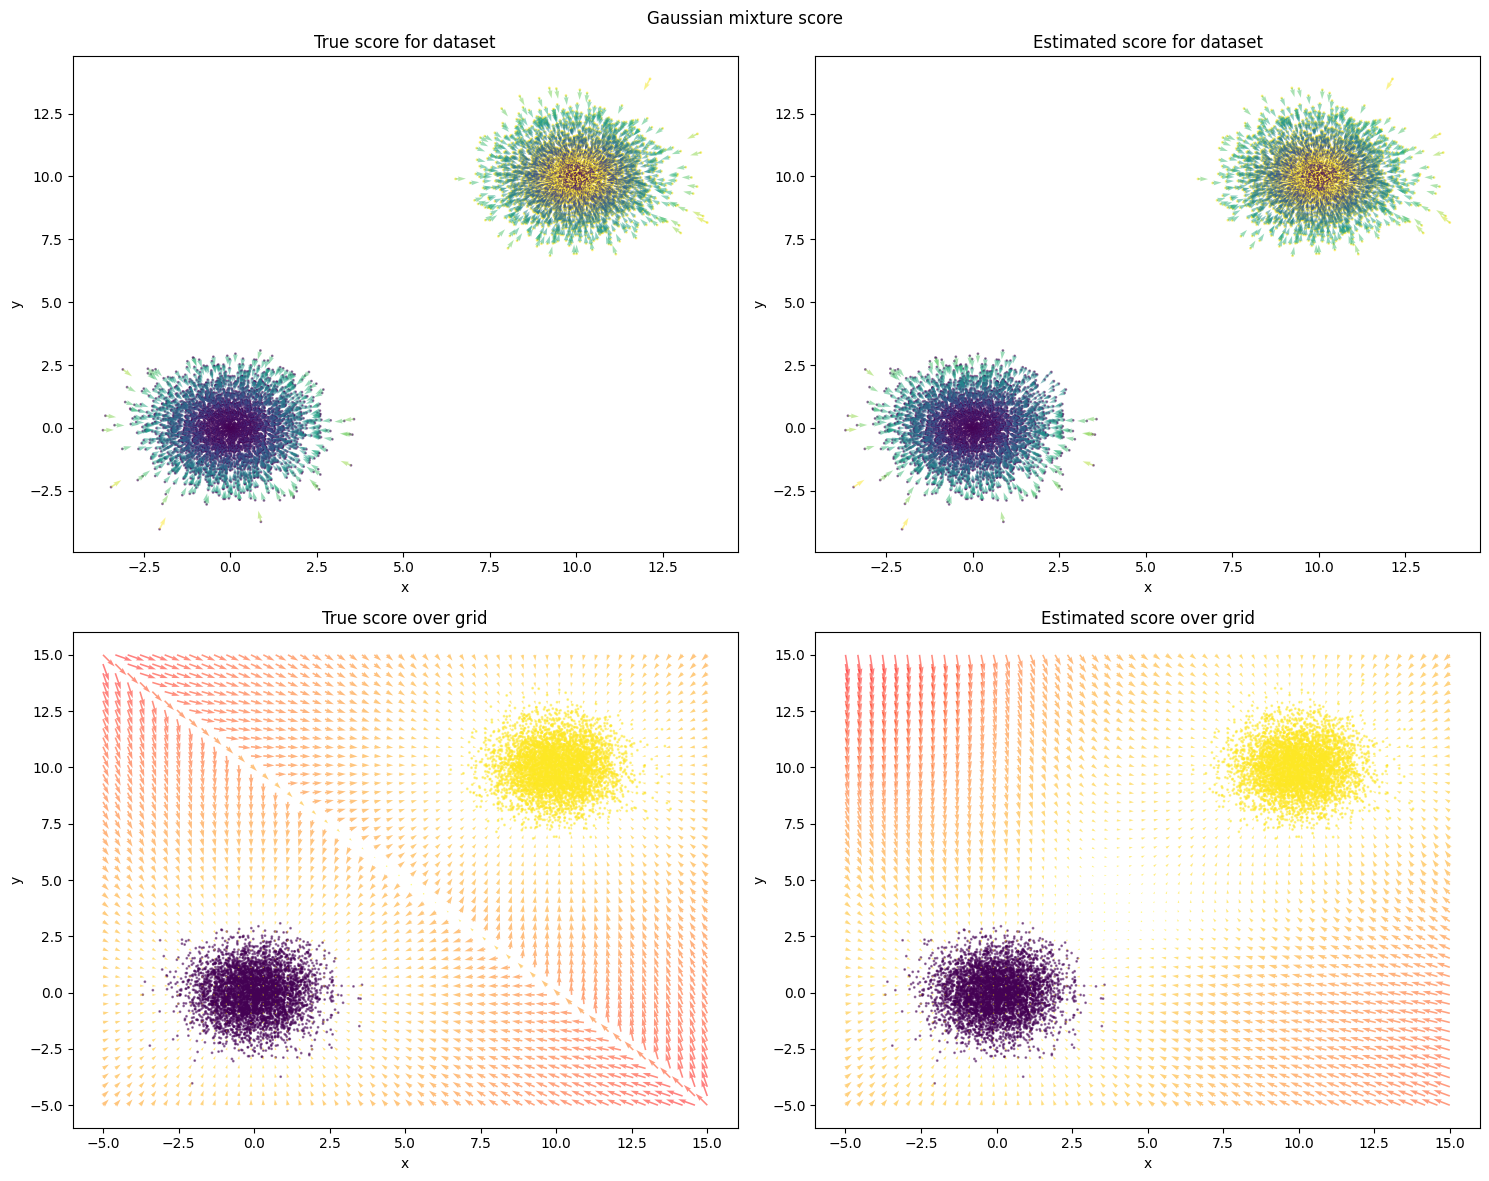

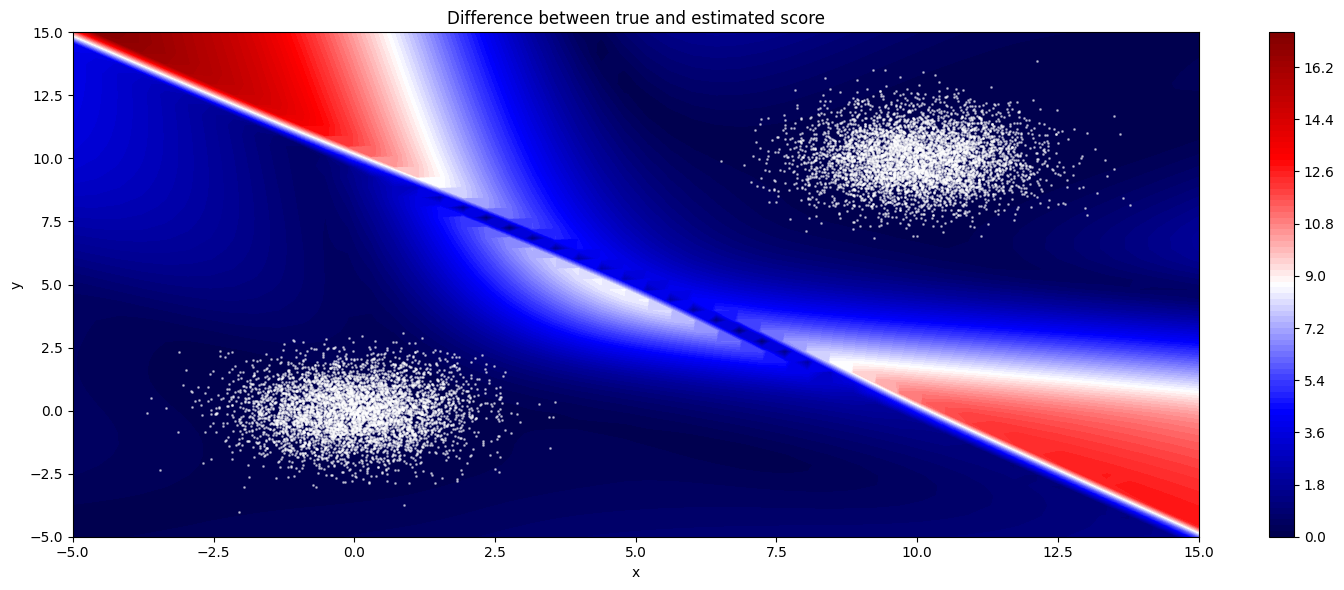

In [18]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, score_network, mus, sigmas, alphas, difference=True)

### Banana-shaped data

In [21]:
ScoreMatching.train(banana_data, score_network, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:56<00:00, 17.73it/s]

Training finished!


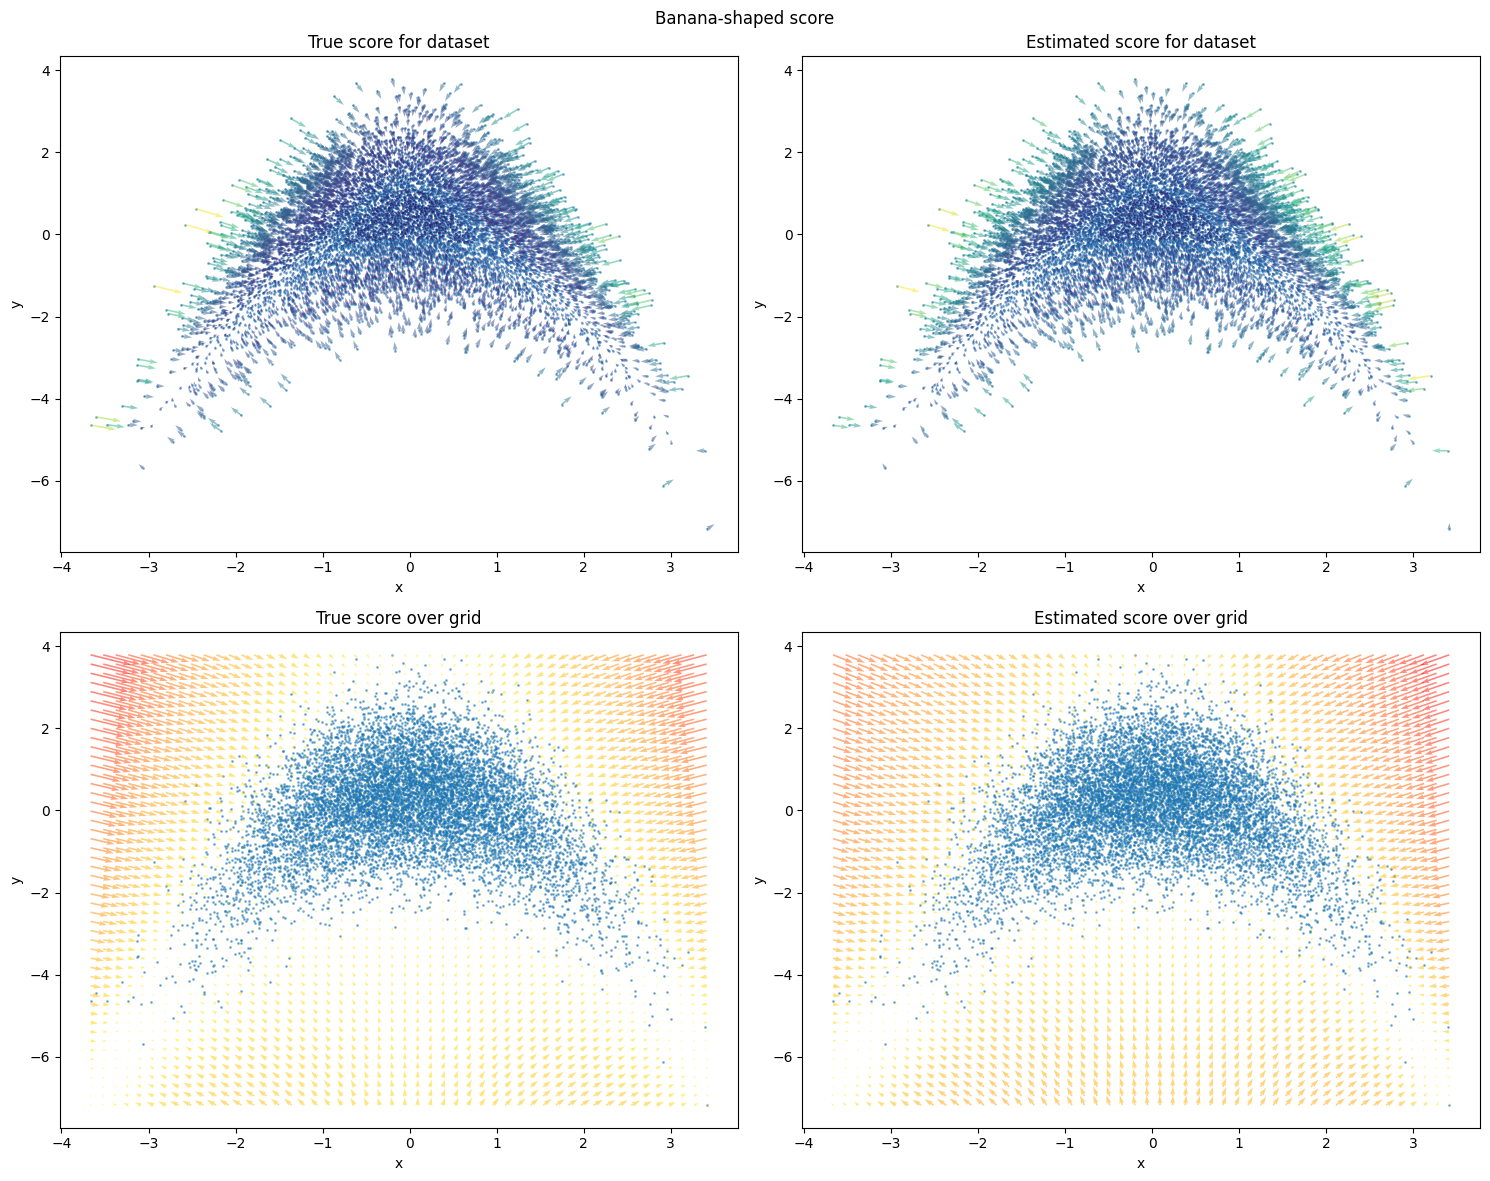

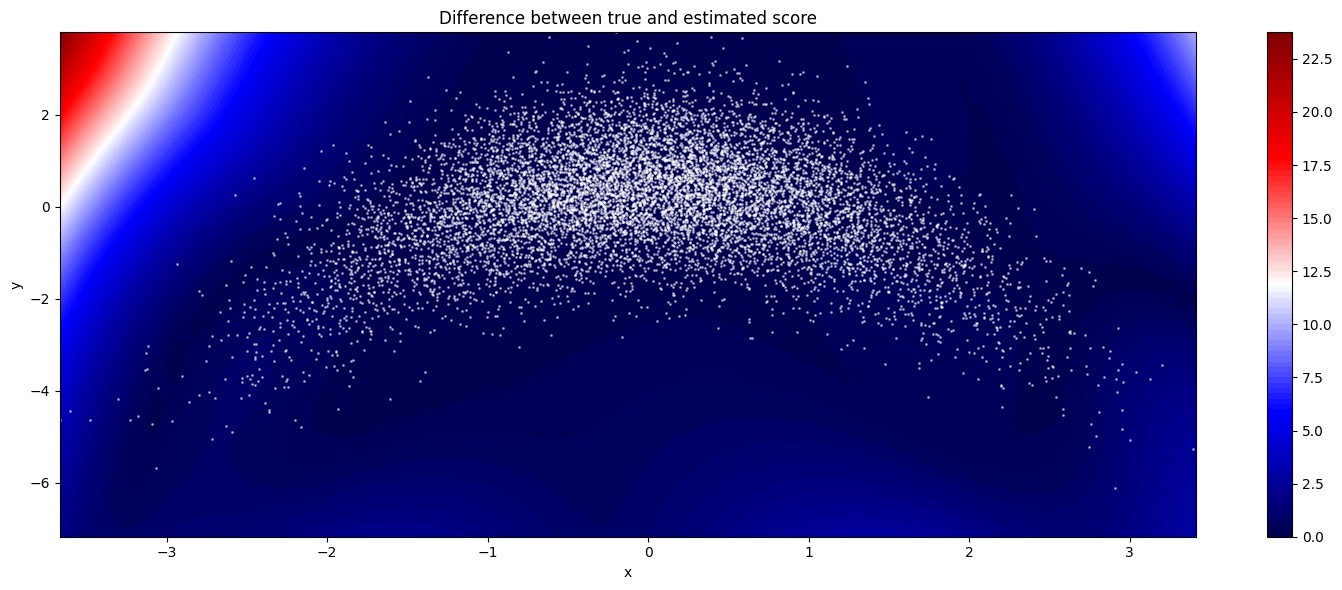

In [23]:
score_visualisation.plot_estimated_score_banana(banana_data, score_network, mu_banana, sigma_banana, difference=True)